In [42]:
from esda.moran import Moran
import libpysal
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [44]:
# Load data
pickle_path = "/crp7/data/homogenized/spicy.pkl"
spicy_data = pd.read_pickle(pickle_path)

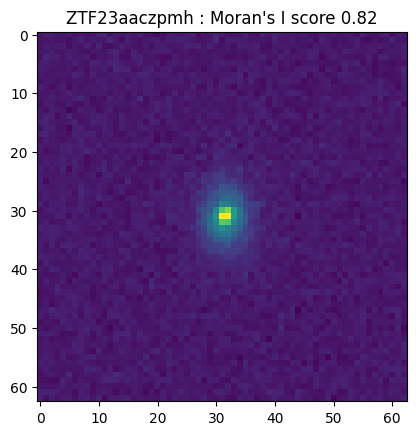

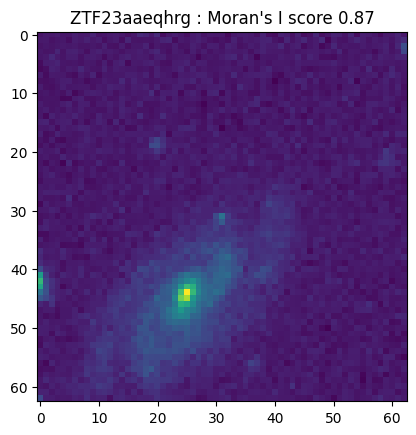

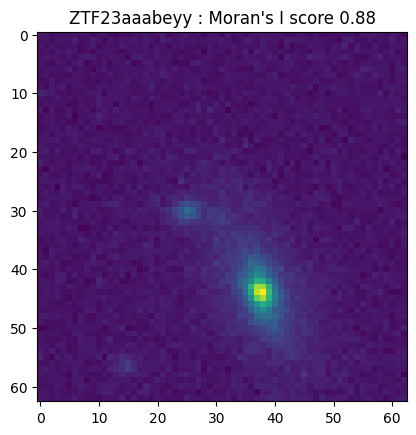

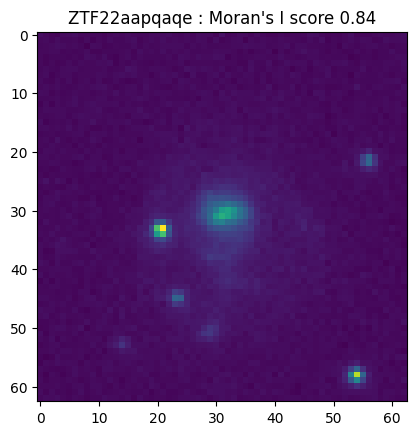

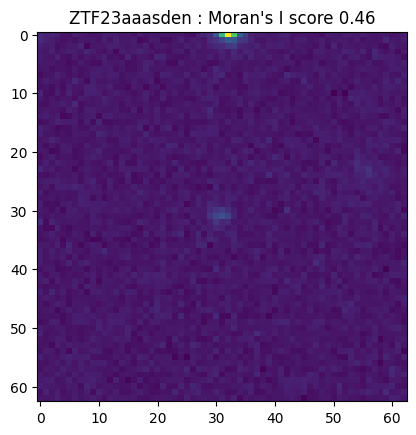

In [46]:

def compute_moransI_score(image_data: np.ndarray) -> float:
    image_data[np.isnan(image_data)] = 0
    weights = libpysal.weights.lat2W(image_data.shape[0], image_data.shape[1])
    moran_class = Moran(image_data, weights)
    return moran_class.I

indices = np.random.randint(0, len(spicy_data["i:objectId"]), 5)

for index in indices:
    row = spicy_data.iloc[index]
    object_id = row["i:objectId"]
    cutoutScience_stampData_last = row["b:cutoutScience_stampData_last"].astype(float)
    moransI_score = compute_moransI_score(cutoutScience_stampData_last)
    plot_title = "{} : Moran's I score = {}".format(object_id, round(moransI_score, 2))
    plt.title(plot_title)
    plt.imshow(cutoutScience_stampData_last)
    plt.show()
